In [1]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the Swimming Pool Dataset in the AssignmentData folder
    
* <span style='font-family:Georgia'> Display the first few rows of the dataset.
 
</div>

In [2]:

swimming = gpd.read_file("AssignmentData/swimming_pools.shp")

swimming.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


# 1. Buffer Analysis



<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the swimming pools data with Geopandas. 
 
</div>

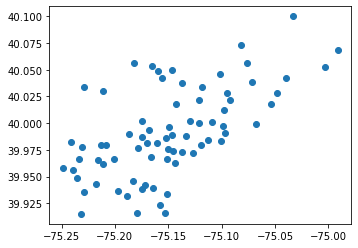

In [3]:
swimming.plot()


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Find the the swimming pool with the following name "Jardel Pool". 
 
</div>

In [4]:
jardel = swimming[swimming["NAME"] == "Jardel Pool"]


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Buffer the Jardel Pool with a distance of your choice. 
 
</div>

In [5]:
jardel_buffer = jardel.geometry.buffer(10)




<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point. 
 
</div>


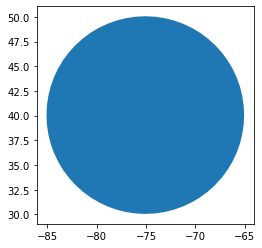

In [6]:
jardel_buffer.plot()


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Which number did you choose for the distance?. 
 
</div>

10


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Is it meters, Kilometers, foot or something else? How do you know it? (Hint: Check the CRS)
 
</div>

In [7]:
jardel_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Can you find out a CRS for Phildelphia that uses Meters/foot as Unit of measurement? (Hint: search in https://epsg.io/)
    
* <span style='font-family:Georgia'> If you manage to find out a CRS that has meter as unit of measure, set the CRS of the swimming pool to the meter/foot based CRS. I am setting here a meter based units. You can use to_crs() 
 
</div>

In [8]:
jardel_meter = jardel.to_crs("EPSG:3651")



<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Check if the CRS is changed and meter is the unit of measurement
 
</div>

In [9]:
jardel_meter.crs

<Projected CRS: EPSG:3651>
Name: NAD83(NSRS2007) / Pennsylvania South
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Now, buffer a distance of your choice (meters) on Jardel swimming pool.
 
</div>


In [10]:
jardel_meter.buffer(10)

2    POLYGON ((828135.291 83727.797, 828135.243 837...
dtype: geometry


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Plot the buffered point.
 
</div>

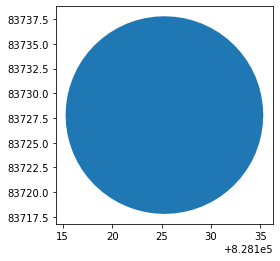

In [11]:
jardel_meter.buffer(10).plot()

# 2. Spatial Join

<div class="alert alert-block alert-info">  
<b>Instructions:</b> 
    
* <span style='font-family:Georgia'> Read the cleaned incidents dataset from the previous Excercise 2.7 Assignment.
    
* <span style='font-family:Georgia'> You might copy the shapefile to your current folder or copy the path of the dataset.
    
* <span style='font-family:Georgia'> Display the first few rows of the data. 
    
</div>

In [12]:
incidents = gpd.read_file("AssignmentData/changeme/incidents_clean.shp")
incidents.head()

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,text_gener,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (-75.16145 39.96233)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)




<div class="alert alert-block alert-info">  
<b>Instructions:</b> 
    
* <span style='font-family:Georgia'>Read the Neighbourhood data in "AssignmentData/Neighborhoods_Philadelphia/ Folder.
      
* <span style='font-family:Georgia'> Display the first few rows of the data. 
    
</div>

In [13]:

gdf_areas = gpd.read_file("AssignmentData/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp")

gdf_areas.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."




<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Check if the incidents data and the neighbourhood data has the same CRS.
 
</div>

In [14]:
gdf_areas.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Pennsylvania - SPCS - S
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
incidents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



<div class="alert alert-block alert-danger">
<b>Alert:</b> They do not have the same CRS, so you need to reproject the incidents data from EPSG:4326 to EPSG:2272.
</div>

In [16]:
incidents_proj = incidents.to_crs("EPSG:2272")



<div class="alert alert-block alert-info">  
<b>Instructions:</b> 
    
* <span style='font-family:Georgia'>Use this code if the points fall the same are as the neighbourhood areas. Change the POLYGON with the neighbourhoods Geodataframe and POINTS with the Incidents GeodataFrame.
      

    
</div>

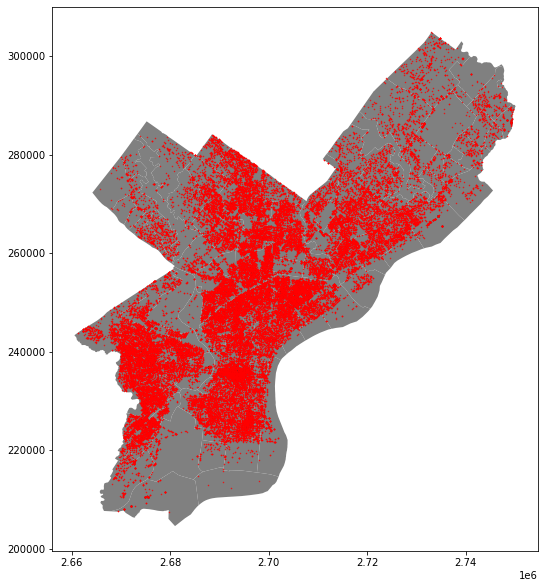

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
gdf_areas.plot(ax=ax, color="gray")
incidents_proj.plot(ax=ax, markersize=0.2, color="Red")


<div class="alert alert-block alert-info">  
<b>Instructions:</b> 
    
* <span style='font-family:Georgia'> Use .sjoin() to join points dataset with the Neighbourhod dataset. Note that we want to determine which point is within which polygon.
    
* <span style='font-family:Georgia'>Remember to use the projected points.
      
* <span style='font-family:Georgia'> You might use these parameters: sjoin(point dataset(XXX -change the name), polygon dataset(XXX -change the name), how="inner", op="within"). Call the joined data what ever name you like. 
    
</div>

In [18]:
joined_incidents = gpd.sjoin(incidents_proj, gdf_areas, how="inner", op='within')
joined_incidents.sample(10)

,objectid,dc_dist,psa,dispatch_d,dispatch_1,dispatch_t,hour_,dc_key,location_b,ucr_genera,...,point_y,lat,lng,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
19344,1232563,18,3,02/03/2020 19:07,02/03/2020,19:07:00,19,2.020180e+11,3900 BLOCK SPRUCE ST,1400,...,39.951174,39.951174,-75.201039,POINT (2683031.257 235382.943),125,UNIVERSITY_CITY,University City,University City,26985.308865,3.299364e+07
6208,356304,8,3,16/01/2020 19:55,16/01/2020,19:55:00,19,2.020080e+11,1200 BLOCK FRANKLIN MILLS CIR,600,...,40.085034,40.085034,-74.959298,POINT (2749234.680 286170.438),18,FRANKLIN_MILLS,Franklin Mills,Franklin Mills,18142.228145,1.484744e+07
15611,948431,25,1,26/01/2020 17:00,26/01/2020,17:00:00,17,2.020250e+11,4200 BLOCK N BROAD ST,800,...,40.017280,40.017280,-75.148787,POINT (2696965.464 259880.999),72,HUNTING_PARK,Hunting Park,Hunting Park,32920.799360,3.902450e+07
47263,3130085,1,1,12/05/2020 21:44,12/05/2020,21:44:00,21,2.020010e+11,1800 BLOCK S 19TH ST,800,...,39.927941,39.927941,-75.177174,POINT (2689965.990 227117.201),156,WEST_PASSYUNK,West Passyunk,West Passyunk,10499.291848,6.494799e+06
59002,3143147,3,3,29/05/2020 00:25,29/05/2020,00:25:00,0,2.020030e+11,S 09TH ST / SNYDER AV,1400,...,39.923306,39.923306,-75.161313,POINT (2694461.948 225559.600),157,EAST_PASSYUNK,East Passyunk,East Passyunk,10987.761846,6.502097e+06
46358,3134487,12,4,30/04/2020 21:19,30/04/2020,21:19:00,21,2.020120e+11,5800 BLOCK FERNWOOD ST,2600,...,39.944295,39.944295,-75.238649,POINT (2672562.516 232576.087),117,KINGSESSING,Kingsessing,Kingsessing,30544.776445,2.877364e+07
49347,3134283,15,2,20/05/2020 21:57,20/05/2020,21:57:00,21,2.020150e+11,6200 BLOCK MONTAGUE ST,300,...,40.024731,40.024731,-75.058586,POINT (2722135.564 263351.100),43,WISSINOMING,Wissinoming,Wissinoming,29226.474499,4.236116e+07
15008,908152,5,1,28/01/2020 15:16,28/01/2020,15:16:00,15,2.020050e+11,4100 BLOCK CHURCHVIEW ST,1400,...,40.024940,40.024940,-75.216750,POINT (2677857.607 262116.866),51,MANAYUNK,Manayunk,Manayunk,16157.054672,1.471206e+07
13716,846916,25,2,02/03/2020 16:09,02/03/2020,16:09:00,16,2.020250e+11,100 BLOCK W HUNTING PARK AV,600,...,40.014252,40.014252,-75.128320,POINT (2702728.256 258947.999),69,FELTONVILLE,Feltonville,Feltonville,22648.988748,2.790797e+07
31401,2176416,22,1,03/02/2020 17:11,03/02/2020,17:11:00,17,2.020220e+11,2300 BLOCK N 15TH ST,2300,...,39.989457,39.989457,-75.158823,POINT (2694453.037 249667.207),78,STANTON,Stanton,Stanton,16115.745169,1.265486e+07




<div class="alert alert-block alert-info">  
<b>Challenge: :</b> 
    
* <span style='font-family:Georgia'> Can you count how many incidents are with in each neighbourhood? 
   
* <span style='font-family:Georgia'>  You might use Pandas groupby  using NAME column and then calculate the size. * You will end up with a Series Datatype so you might also covert this to pandas dataframe using to_frame().reset_index.
    
* <span style='font-family:Georgia'>You can also give the your columns names using DF.columns = ["XXX", "YYY"].

    
</div>


In [19]:
grouped = joined_incidents.groupby("NAME").size()
df = grouped.to_frame().reset_index()
df.columns = ["NAME", "Counts"]

In [20]:
df.head()

,NAME,Counts
0,ACADEMY_GARDENS,81
1,AIRPORT,162
2,ALLEGHENY_WEST,923
3,ANDORRA,56
4,ASTON_WOODBRIDGE,74



<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> How many Incidents are in BREWERYTOWN	 neighbourhood.
 
</div>

451


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Which Neighbourhood has the lowest Crime incidents? Which Neighbourhood has the highest Crime incidents?

 
</div>

In [21]:
df.sort_values(by=['Counts'])

,NAME,Counts
80,MECHANICSVILLE,3
88,NAVY_YARD,7
23,CRESTMONT_FARMS,7
112,PORT_RICHMOND,8
108,PENNYPACK_PARK,20
...,...,...
117,RITTENHOUSE,1532
99,OLNEY,1545
116,RICHMOND,1782
21,COBBS_CREEK,1969





<div class="alert alert-block alert-success">
<b>Info:</b> 
    
    MECHANICSVILLE Has only 3 incidents which is the lowest crime incidents per Neighbourhood.
    
    
    UPPER_KENSINGTON has the Highest crime incidents in Philly with a record 2225 crime incidents.
</div>




<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Join the grouped count dataframe with the Original Neighbourhoods - the grouped data is Pandas dataframe and the Neighoburhoods are Geodataframe) So you can use a normal pandas merge. 
    
* <span style='font-family:Georgia'> Use XXXX.merge(df, on="NAME", how="outer") --> XXXX is the Geodataframe. 


 
</div>

In [22]:
merged_areas = gdf_areas.merge(df, on="NAME", how="outer")

In [23]:
merged_areas.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry,Counts
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",142
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",413
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",281
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",134
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",282




<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'> Check the type of the merged data ( Make sure it is GeoDataFrame)

 
</div>

In [24]:
type(merged_areas)

geopandas.geodataframe.GeoDataFrame


<div class="alert alert-block alert-info">
    
* <span style='font-family:Georgia'>  Export the merged GeoDataframe as GeoJson, add driver='GeoJSON' in to_file() method. We will use this file Later
 
</div>

In [25]:
merged_areas.to_file("AssignmentData/neighbourhod_crimes.Geojson", driver='GeoJSON')


<div class="alert alert-block alert-success">
<font size="50"><center><b font size="50">Good Job</b></font></center>
</div>
